In [ ]:
import numpy as np

In [1]:
import os
base_dir = '/content/drive/MyDrive/BOOTCAMP_DSG1/DEEP-LEARNING/frutas'

In [2]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test_data')

# RUTA LA ENTRENAMIENTO DE PERROS Y GATOS

In [3]:
train_apple_dir = os.path.join(train_dir,'Apple')
train_mango_dir = os.path.join(train_dir,'mango')
train_orange_dir = os.path.join(train_dir,'orange')

val_apple_dir = os.path.join(validation_dir,'Apple')
val_mango_dir = os.path.join(validation_dir,'mango')
val_orange_dir = os.path.join(validation_dir,'orange')

# MOSTRAMOS UNA IMAGEN DE NUESTRO DATASET

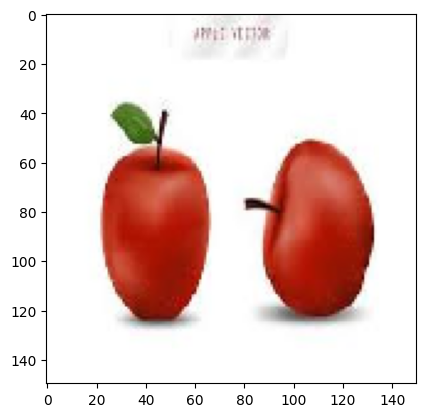

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_apple_dir,fname) for fname in os.listdir(train_apple_dir)]

img_path = fnames[0]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)

plt.figure()
imgplot = plt.imshow(image.array_to_img(x))
plt.show()

# CODIFICACIÓN DE CATEGORIAS

In [5]:
classes=sorted(os.listdir(train_dir))
",".join([f"{i}:{c}" for i,c in enumerate(classes)])

'0:Apple,1:mango,2:orange'

# PROCESAMIENTO DE IMAGENES

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_data = ImageDataGenerator(rescale=1./255)

# aplicamos data aumengtation
train_data = ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

val_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

# CREAR DATASETS DE ENTRENAMIENTO VALIDACIÓN Y PRUEBAS CON ESCALAMIENTO

In [8]:
training_set = train_data.flow_from_directory(train_dir,
                                              classes=classes,
                                              color_mode='rgb',
                                              target_size=(256,256),
                                              batch_size=64,
                                              class_mode='categorical')

Found 691 images belonging to 3 classes.


In [10]:
validation_set = val_data.flow_from_directory(
    validation_dir,
    classes=classes,
    color_mode='rgb',
    target_size=(256,256),
    batch_size=64,
    class_mode='categorical'
)

test_set = test_data.flow_from_directory(
    test_dir,
    classes=classes,
    color_mode='rgb',
    target_size=(256,256),
    batch_size=64,
    class_mode='categorical'
)

Found 202 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


# CREAMOS LA RED NEURONAL CONVOLUCIONAL

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [27]:
modelo = Sequential()
modelo.add(Conv2D(32,3,activation='relu',input_shape=(256,256,3)))
modelo.add(MaxPooling2D(4))
modelo.add(Conv2D(32,3,activation='relu'))
modelo.add(MaxPooling2D(4))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(3,activation='softmax'))

modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,259 (3.56 MB)

 Trainable params: 932,259 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

# COMPILAMOS Y ENTRENAMOS EL MODELO

In [28]:
modelo.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
history = modelo.fit(training_set,
                     epochs=3,
                     batch_size=100,
                     validation_data=validation_set)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.3469 - loss: 1.2778

# GUARDAMOS MODELO ENTRENADO

In [ ]:
modelo.save('model_frutas.h5')

# CARGAMOS MODELO ENTRENADO

In [ ]:
from tensorflow import keras
red = keras.models.load_model('/content/model_frutas.h5')
red

<Sequential name=sequential_4, built=True>

# EVALUACION DEL MODELO

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import numpy as np

predict = modelo.predict(test_set)
score = accuracy_score(test_set.classes,np.round(predict))
print(f'el score del test es  : {score}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
el score del test es  : 0.5


In [ ]:
matrix = confusion_matrix(test_set.classes,np.round(predict))
matrix

array([[1, 0],
       [1, 0]])

<Figure size 1100x1100 with 0 Axes>

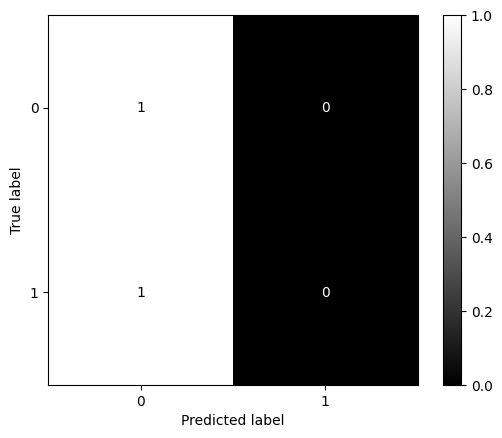

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(test_set.classes, np.round(predict))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='gray')
plt.show()

# GRAFICAMOS ACCURACY Y LOSS

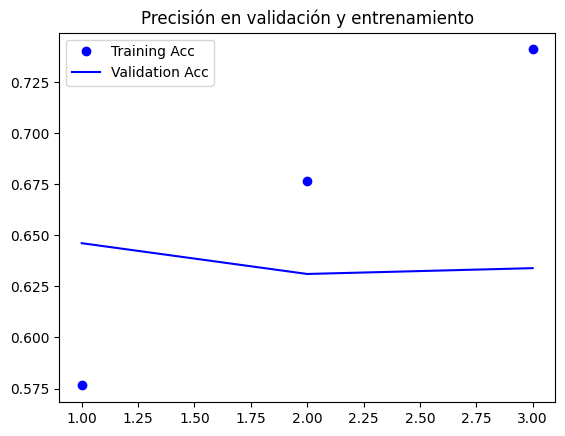

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.title('Precisión en validación y entrenamiento')
plt.legend()
plt.show()

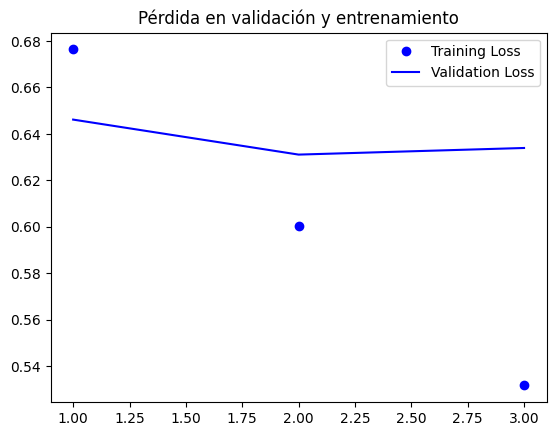

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Pérdida en validación y entrenamiento')
plt.legend()
plt.show()

# EJEMPLO DE PREDICCIÓN

In [ ]:
perro = image.load_img('/content/drive/MyDrive/BOOTCAMP_DSG1/DEEP-LEARNING/datasets/test/perros/perro_test.jpg',target_size=(64,64))
gato = image.load_img('/content/drive/MyDrive/BOOTCAMP_DSG1/DEEP-LEARNING/datasets/test/gatos/gato_test.jpg',target_size=(64,64))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
0.0
es un gato


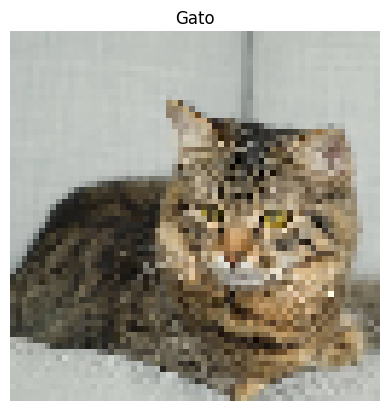

In [ ]:
test_image = image.img_to_array(gato)
test_image = np.expand_dims(test_image,axis=0)

training_set.class_indices

result = modelo.predict(test_image)
print(result[0][0])

predict_final = np.round(result[0][0])

if predict_final == 1:
  print('es un perro')
  plt.imshow(perro)
  plt.title('Perro')
  plt.axis('off')
  plt.show()
elif predict_final == 0:
  print('es un gato')
  plt.imshow(gato)
  plt.title('Gato')
  plt.axis('off')
  plt.show()
else:
  print('no se que es')
